# 2. EDA

### 2.1 Poziom - Miasta

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("who_aap_2021_v9_11august2022.xlsx", sheet_name="AAP_2022_city_v9")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()

C:\Users\Tymek\AppData\Local\Temp\ipykernel_14836\24607500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()
C:\Users\Tymek\AppData\Local\Temp\ipykernel_14836\24607500.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("/", "_").str.lower()


### Na poziomie miast, skupiono się na klasycznej eksploracyjnej analizie danych

W zbiorze danych jest 6874 miast lub regionów lokalnych. To wskazuje na utrudnioną analizę poprzez wizualizacje przestrzenną. Przy takiej ilości punktów pomiarowych analiza i interpretacja wizualizacji byłaby nie-miarodajna. 

Dodatkowo, zbiór danych nie zawiera geolokalizacji miast, a mapowanie po nazwach miejscowości mogłoby się nie udać. Więc wizualizacja mapy została pominięta.

In [8]:
df.city_or_locality.nunique()

6874

### Nie uwzględniono zmiennych o pokryciu czasowym

Ze względu na małą dostępność danych pomiarowych o charakterze "pokrycie czasowe" dla PM10 i PM2.5 nie zostanę one uwzględnione w dalszej analizie.

Ilość danych jest niewystarczająca, nawet jeśli dokonano by imputacji. Informacje nie odzwierciedlały by prawdy, dodatkowo ciężko byłoby określić jak pokrycie czasowe wpływa na roczny poziom zanieczyszczenia.

Sam fakt, tak dużej ilości brakujących danych o pokryciu czasowym świadczy negatywnie o jakości tego zbioru danych i o jego wiarygodności.

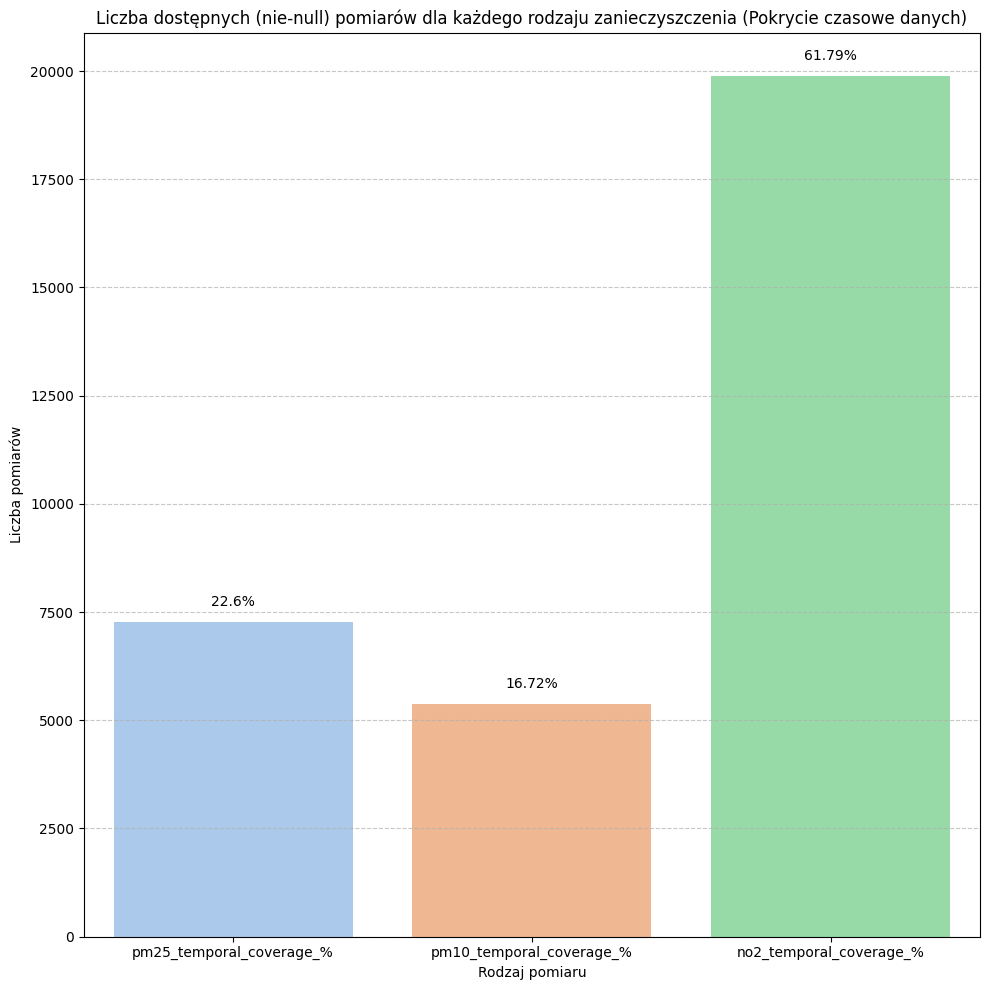

In [39]:
# Liczba nie-null dla każdego parametru
non_null_counts = df[["pm25_temporal_coverage_%", "pm10_temporal_coverage_%", "no2_temporal_coverage_%"]].notnull().sum()
non_null_counts = non_null_counts.reset_index()
non_null_counts.columns = ["Rodzaj_pomiaru", "Liczba_pomiarów"]

# Wykres
plt.figure(figsize=(10, 10))
sns.barplot(data=non_null_counts, x="Rodzaj_pomiaru", y="Liczba_pomiarów",hue="Rodzaj_pomiaru", palette="pastel")

# Tytuł i etykiety
plt.title("Liczba dostępnych (nie-null) pomiarów dla każdego rodzaju zanieczyszczenia (Pokrycie czasowe danych)")
plt.xlabel("Rodzaj pomiaru")
plt.ylabel("Liczba pomiarów")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Dodanie wartości liczbowych nad słupkami
for index, row in non_null_counts.iterrows():
    percent_share = row.Liczba_pomiarów / len(df) * 100
    plt.text(index, row.Liczba_pomiarów + 300, f'{round(percent_share,2)}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Analiza rozkładów danych 

Wszystkie rozkłady danych są asymetryczne prawostronne. 

PM2.5 skupia się w przedziale od 0 do 30. Szczyt wykresu jest przesunięty względem średniej. Powodem jest wiele wartości zaoobserowowanych w przedziale 30>.

PM10 jest mocniej skupiony wookół średniej, która jest relatywnie blisko szczytu wykresu - mniej outlierów niż PM2.5

Dwutlenek azotu jest najmniej asymetryczny. Szczyt wykresu i średnia prawie się pokrywają. Występuje najmniej outlierów.

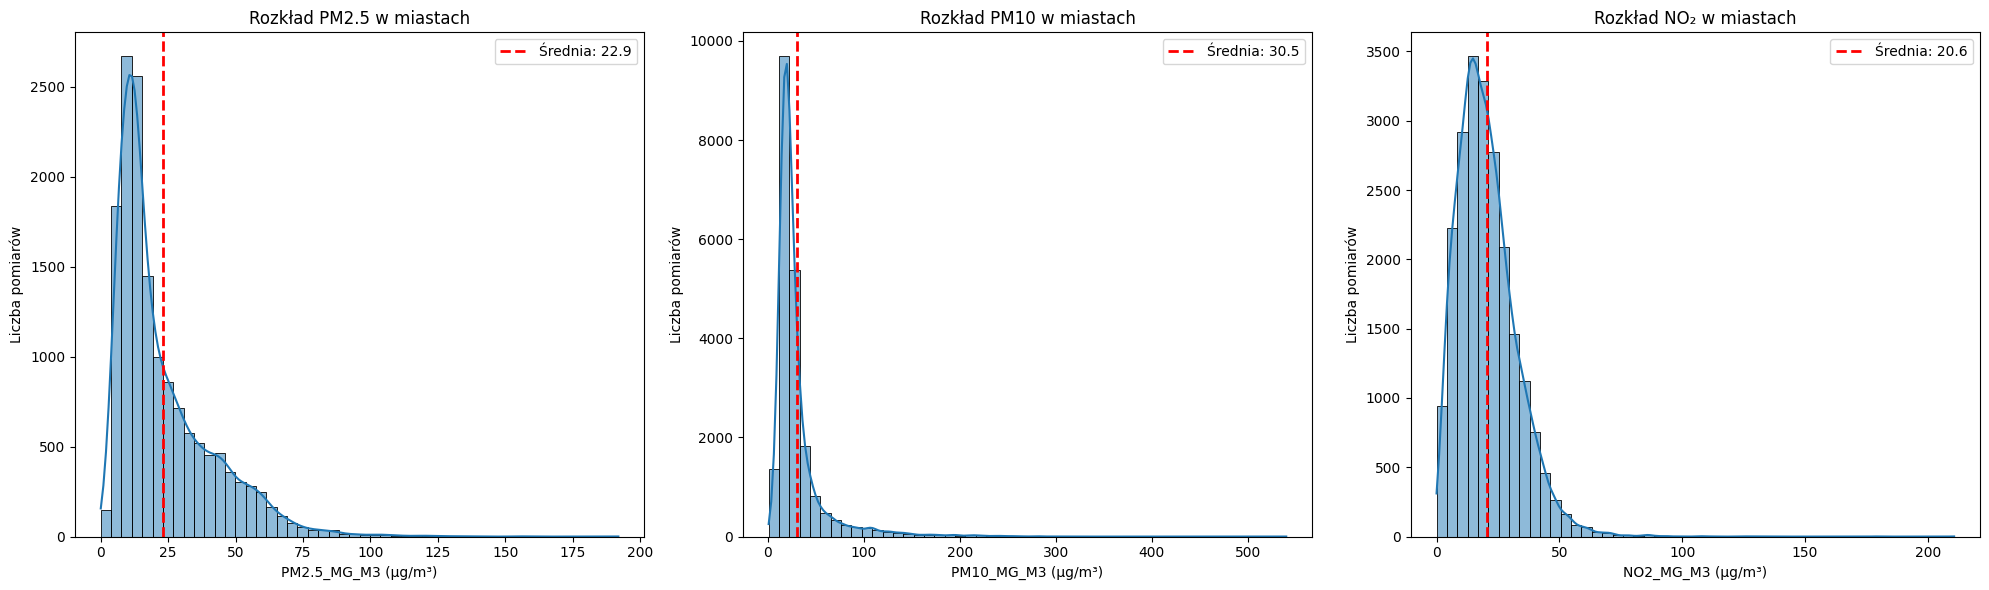

In [16]:
# Tworzymy figurę i 3 podwykresy (1 wiersz, 3 kolumny)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 wiersz, 3 kolumny

# Lista kolumn i tytułów
pollutants = ["pm2.5_μg_m3", "pm10_μg_m3", "no2_μg_m3"]
titles = ["Rozkład PM2.5 w miastach", "Rozkład PM10 w miastach", "Rozkład NO₂ w miastach"]

# Generowanie wykresów
for ax, pollutant, title in zip(axes, pollutants, titles):
    sns.histplot(df[pollutant], bins=50, kde=True, ax=ax)
    
    # Obliczanie średniej
    mean_value = df[pollutant].mean()
    
    # Dodanie linii średniej
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Średnia: {mean_value:.1f}')
    
    # Ustawienia wykresu
    ax.set_title(title)
    ax.set_xlabel(f"{pollutant.upper()} (μg/m³)")
    ax.set_ylabel("Liczba pomiarów")
    ax.legend()

plt.tight_layout()
plt.show()



Najwięcej danych pomiarowych jest dla dwutlenku azotu a najmniej dla PM2.5, różnica jest dosyć drastyczna (ponad 20 procentowa różnica w dostępności danych)

Jest to bardzo ciekawe, ponieważ z tych trzech zanieczyszczeń to PM2.5 jest najbardziej szkodliwe. 

Dane pochodzę od WHO, które ustala roczne dopuszczalne limity zanieczyszczenia powietrza.
Można podejrzewać, że niektóre dane pomiarowe są zatajane / nie udostępniane, ze względu na strach przed reperkusjami.

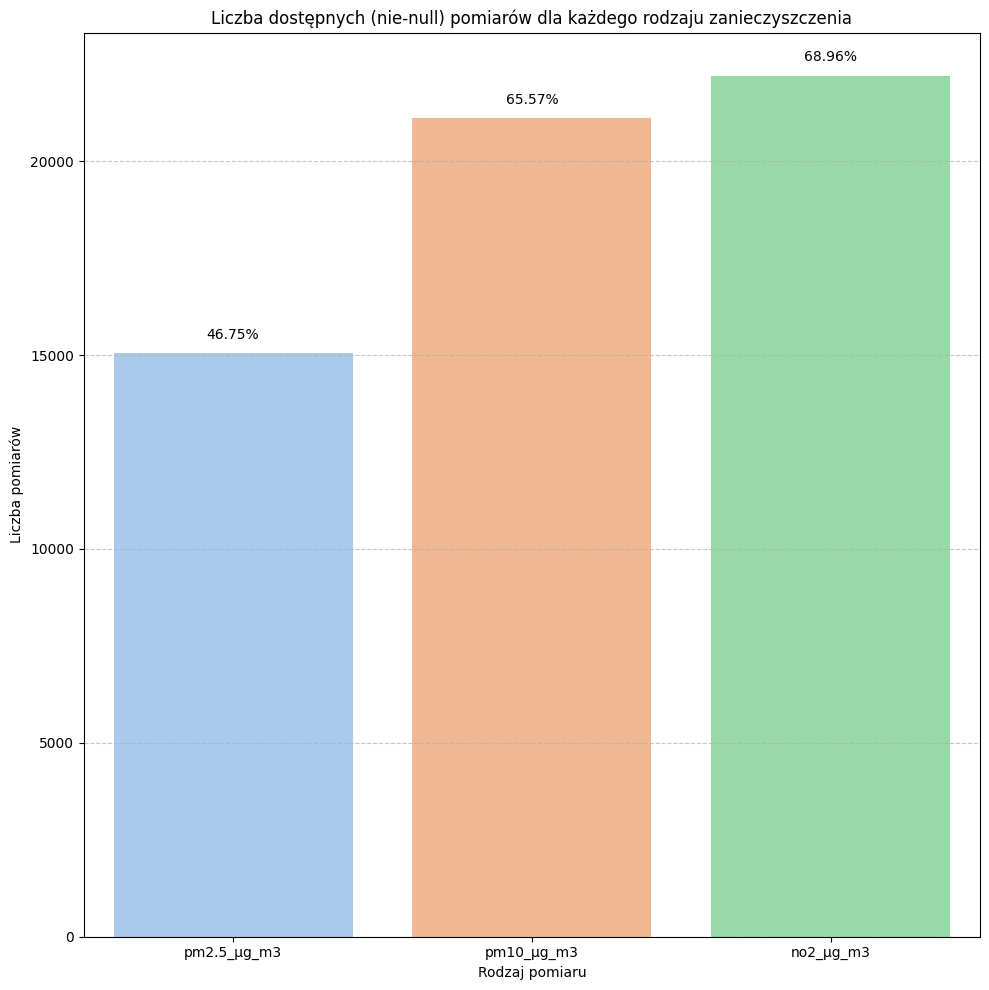

In [36]:
# Liczba nie-null dla każdego parametru
non_null_counts = df[["pm2.5_μg_m3", "pm10_μg_m3", "no2_μg_m3"]].notnull().sum()
non_null_counts = non_null_counts.reset_index()
non_null_counts.columns = ["Rodzaj_pomiaru", "Liczba_pomiarów"]

# Wykres
plt.figure(figsize=(10, 10))
sns.barplot(data=non_null_counts, x="Rodzaj_pomiaru", y="Liczba_pomiarów",hue="Rodzaj_pomiaru", palette="pastel")

# Tytuł i etykiety
plt.title("Liczba dostępnych (nie-null) pomiarów dla każdego rodzaju zanieczyszczenia")
plt.xlabel("Rodzaj pomiaru")
plt.ylabel("Liczba pomiarów")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Dodanie wartości liczbowych nad słupkami
for index, row in non_null_counts.iterrows():
    percent_share = row.Liczba_pomiarów / len(df) * 100
    plt.text(index, row.Liczba_pomiarów + 300, f'{round(percent_share,2)}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [47]:
df

,who_region,iso3,who_country_name,city_or_locality,measurement_year,pm2.5_μg_m3,pm10_μg_m3,no2_μg_m3,pm25_temporal_coverage_%,pm10_temporal_coverage_%,no2_temporal_coverage_%,reference,number_and_type_of_monitoring_stations,version_of_the_database,status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022,NaN
32187,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32188,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32189,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN


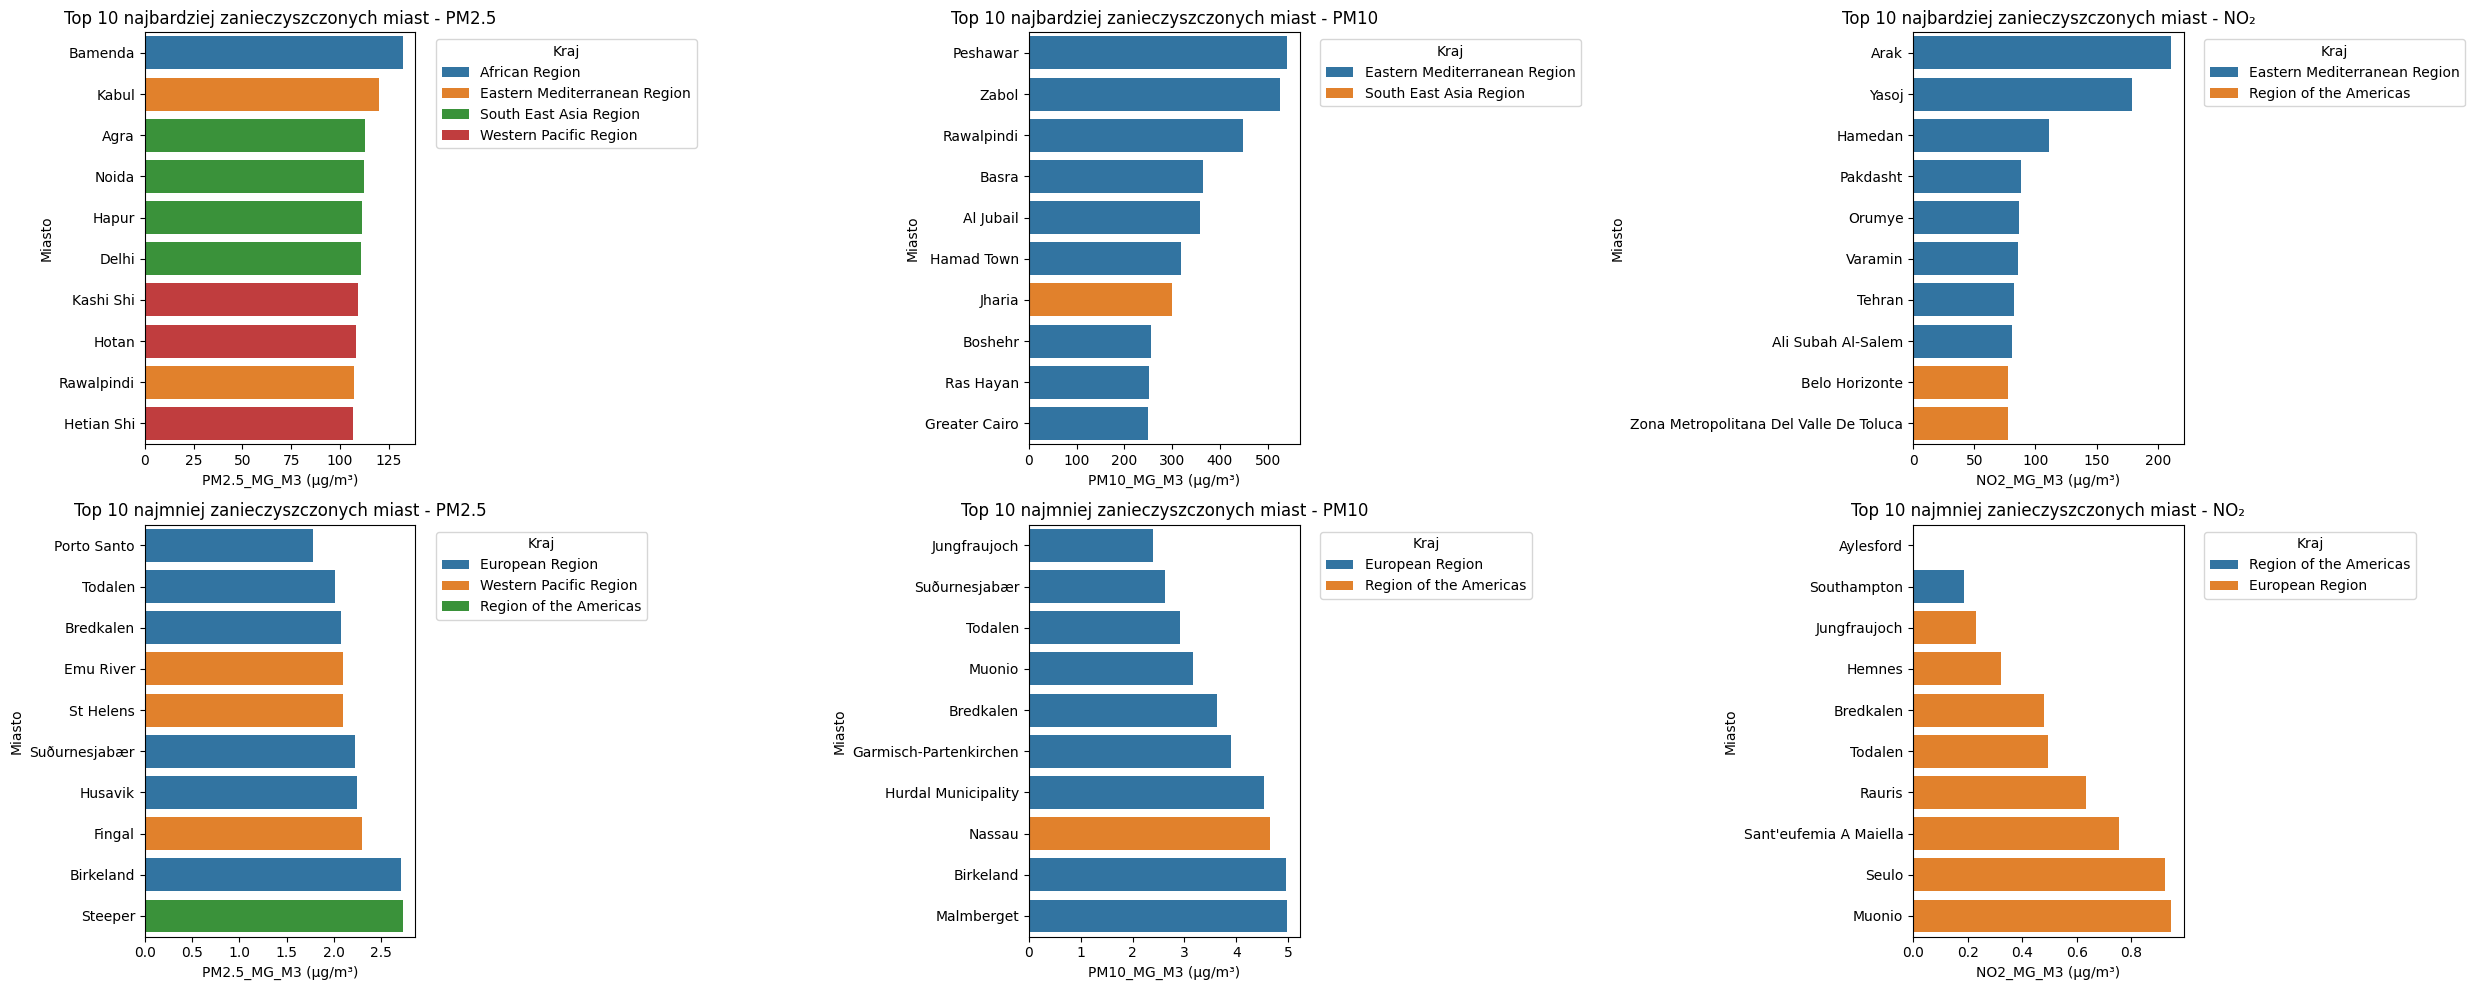

In [50]:
# Przygotowanie danych
pollutants = ["pm2.5_μg_m3", "pm10_μg_m3", "no2_μg_m3"]
titles = [
    "Top 10 najbardziej zanieczyszczonych miast - PM2.5", "Top 10 najmniej zanieczyszczonych miast - PM2.5",
    "Top 10 najbardziej zanieczyszczonych miast - PM10", "Top 10 najmniej zanieczyszczonych miast - PM10",
    "Top 10 najbardziej zanieczyszczonych miast - NO₂", "Top 10 najmniej zanieczyszczonych miast - NO₂"
]

# Tworzymy figure
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
axes = axes.flatten()  # spłaszczamy układ dla łatwiejszego iterowania

# Generowanie wykresów
for i, pollutant in enumerate(pollutants):
    # Top 10
    top10 = df[["city_or_locality", "who_region", pollutant]].dropna()
    top10 = top10.groupby(["city_or_locality", "who_region"])[pollutant].mean().reset_index()
    top10 = top10.sort_values(pollutant, ascending=False).head(10)

    sns.barplot(data=top10, x=pollutant, y="city_or_locality", hue="who_region", dodge=False, ax=axes[i])
    axes[i].set_title(titles[i*2])
    axes[i].set_xlabel(f"{pollutant.upper()} (μg/m³)")
    axes[i].set_ylabel("Miasto")
    axes[i].legend(title="Kraj", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Bottom 10
    bottom10 = df[["city_or_locality", "who_region", pollutant]].dropna()
    bottom10 = bottom10.groupby(["city_or_locality", "who_region"])[pollutant].mean().reset_index()
    bottom10 = bottom10.sort_values(pollutant, ascending=True).head(10)

    sns.barplot(data=bottom10, x=pollutant, y="city_or_locality", hue="who_region", dodge=False, ax=axes[i+3])
    axes[i+3].set_title(titles[i*2 + 1])
    axes[i+3].set_xlabel(f"{pollutant.upper()} (μg/m³)")
    axes[i+3].set_ylabel("Miasto")
    axes[i+3].legend(title="Kraj", bbox_to_anchor=(1.05, 1), loc='upper left')

# Upiększenia
plt.tight_layout()
plt.show()
